In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
import joblib
from sklearn.model_selection import train_test_split

# Data load

In [4]:
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv', parse_dates=['date'])

## 불필요 columns 제거

In [5]:
test.drop('id', axis=1, inplace=True)

# Column 설정

In [6]:
target = 'sales'

In [7]:
columns_cat = joblib.load('columns_cat.pkl')
columns_binary_num = joblib.load('columns_binary_num.pkl')
columns_binary_cat = joblib.load('columns_binary_cat.pkl')
columns_dt = joblib.load('columns_dt.pkl')

In [8]:
columns_num = []

for column in train.columns :
    
    if column not in columns_cat :
        columns_num.append(column)

In [9]:
for column in columns_dt :
    columns_num.remove(column)

In [10]:
columns_cat

['store', 'item']

In [11]:
columns_num

['sales']

In [12]:
columns_dt

['date']

In [13]:
joblib.dump(columns_num, 'columns_num.pkl')

['columns_num.pkl']

## datetime 설정

In [14]:
def data_summary(data):
    summary = pd.DataFrame(data.dtypes, columns=['Dtype'])
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Unique value'] = data.nunique().values
    summary['Null count'] = data.isnull().sum().values
    summary['Null percent'] = data.isnull().sum().values / len(data) * 100
    summary['Null percent'] = round(summary['Null percent'], 1)
    
    return summary

In [15]:
def date_features(data, column):
    data['year'] = data[column].dt.year
    data['quarter'] = data[column].dt.quarter
    data['month'] = data[column].dt.month   # Data preprocessing 때 string으로 변환해야함
    data['day'] = data[column].dt.day
    data['day_of_week'] = data[column].dt.dayofweek   # Monday = 0, Sunday = 6
    data['is_weekend'] = data[column].dt.weekday // 5
    
    data.drop(column, axis=1, inplace=True)
    
    date_columns = data.columns[-6:].to_list()
    other_columns = data.columns[:-6].to_list()
    columns = date_columns + other_columns
    
    data = data[columns]
    
    return data

In [16]:
train = date_features(train, 'date')
train

,year,quarter,month,day,day_of_week,is_weekend,store,item,sales
0,2013,1,1,1,1,0,1,1,13
1,2013,1,1,2,2,0,1,1,11
2,2013,1,1,3,3,0,1,1,14
3,2013,1,1,4,4,0,1,1,13
4,2013,1,1,5,5,1,1,1,10
...,...,...,...,...,...,...,...,...,...
912995,2017,4,12,27,2,0,10,50,63
912996,2017,4,12,28,3,0,10,50,59
912997,2017,4,12,29,4,0,10,50,74
912998,2017,4,12,30,5,1,10,50,62


In [17]:
train_summary = data_summary(train)
train_summary

,Dtype,Unique value,Null count,Null percent
year,int64,5,0,0.0
quarter,int64,4,0,0.0
month,int64,12,0,0.0
day,int64,31,0,0.0
day_of_week,int64,7,0,0.0
is_weekend,int64,2,0,0.0
store,int64,10,0,0.0
item,int64,50,0,0.0
sales,int64,213,0,0.0


In [18]:
columns_cat.extend(['year', 'quarter', 'month', 'day', 'day_of_week', 'is_weekend'])
# columns_cat.extend(['quarter', 'month', 'day'])
# columns_num.extend(['year', 'day_of_week'])
# columns_binary_num.append('is_weekend')

# Train & test set 분리

In [19]:
# train, test = train_test_split(data, random_state=30)
# train, test = train_test_split(data, stratify=target, random_state=30)   # 계층적 sampling

# EDA
- EDA는 train set으로만 진행
- Train set가 너무 크면, 탐색을 위한 별도의 sampling 진행

In [20]:
train_sp = train.sample(frac=0.1, random_state=30)
train_sp.shape

(91300, 9)

## 수치형 data

- 수치형 data가 target인 sales 밖에 없음

In [21]:
# k = len(columns_num)

# for i in range(k) :
#     with sns.axes_style('white') :
#         sns.jointplot(data=train_sp, x=columns_num[i], y=target, kind='reg')

In [22]:
corr_matrix = train_sp.corr()
corr_matrix[target].sort_values(ascending=False)

sales          1.000000
day_of_week    0.227319
year           0.184692
is_weekend     0.182768
quarter        0.092792
month          0.085699
day            0.003160
store         -0.009425
item          -0.054897
Name: sales, dtype: float64

<AxesSubplot:>

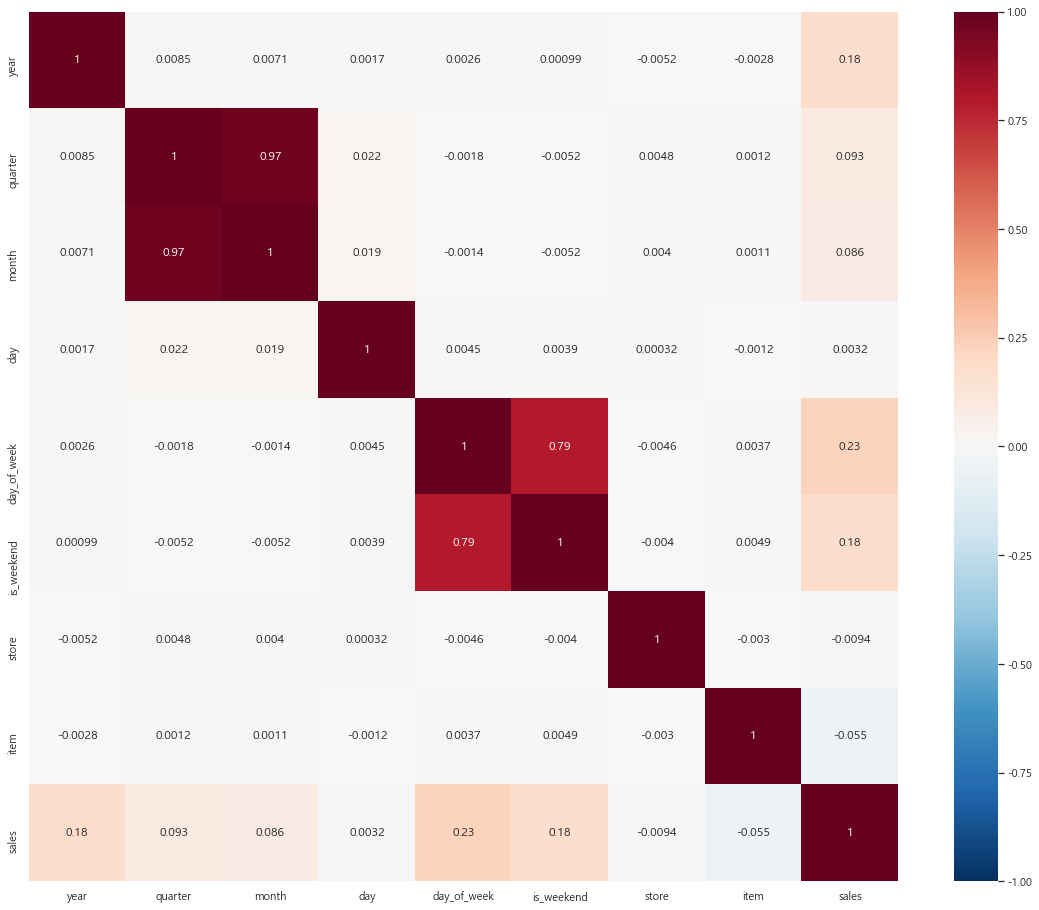

In [23]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, square=True, cbar=True, ax=ax)

## 범주형 data

In [24]:
def get_crosstab(data, column, target) :
    crosstab = pd.crosstab(data[column], data[target], normalize='index') * 100
    
    return crosstab

In [25]:
columns_cat_count = []

for column in columns_cat :
    
    if len(train[column].value_counts()) <= 20 :
        columns_cat_count.append(column)

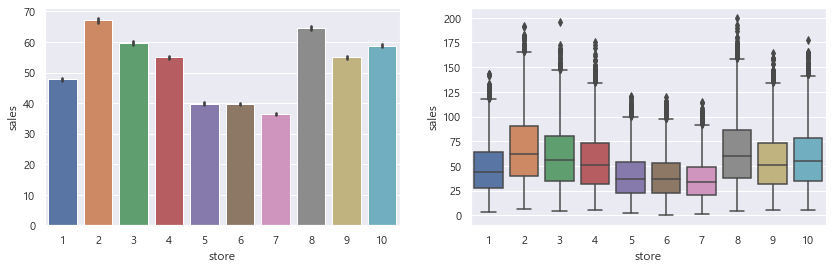

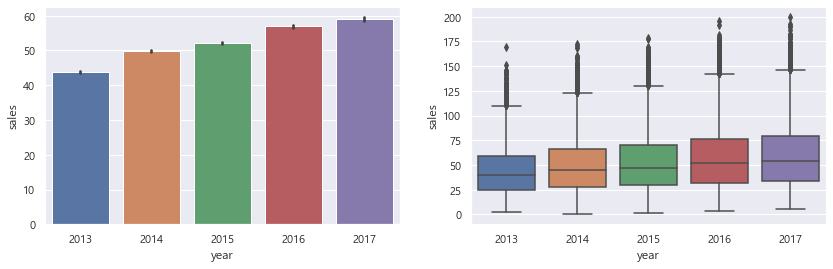

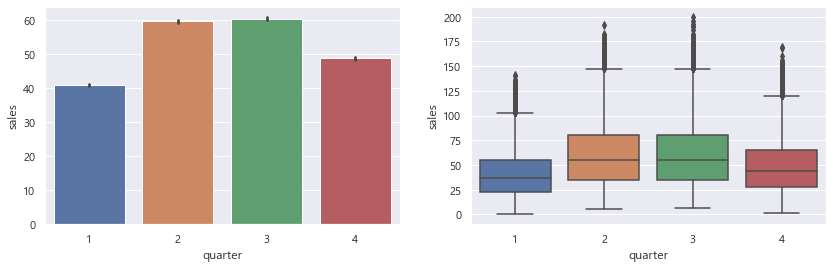

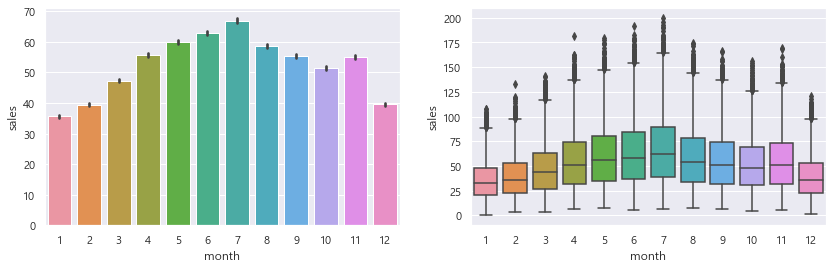

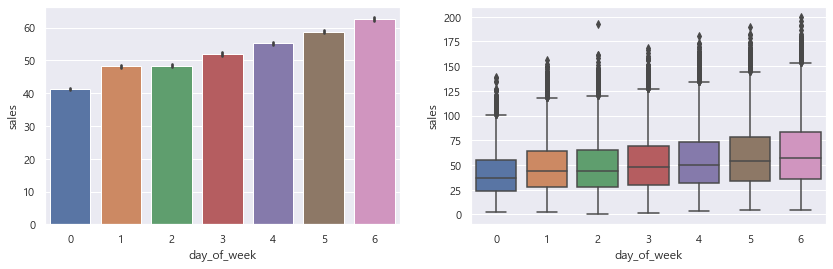

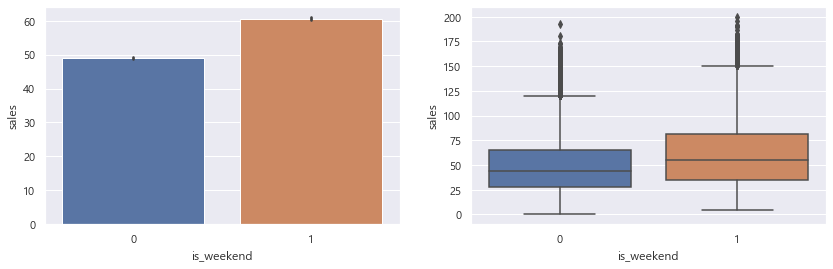

In [26]:
k = len(columns_cat_count)

for i in range(k) :
    crosstab = get_crosstab(train_sp, columns_cat_count[i], target)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    sns.barplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax1)
    sns.boxplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax2)

- year과 day_of_week는 숫자가 커짐에 따라 sales가 커지므로, 수치형 data로 취급해도 됨

In [27]:
columns_cat_count = []

for column in columns_cat :
    
    if 20 < len(train[column].value_counts()) <= 50 :
        columns_cat_count.append(column)

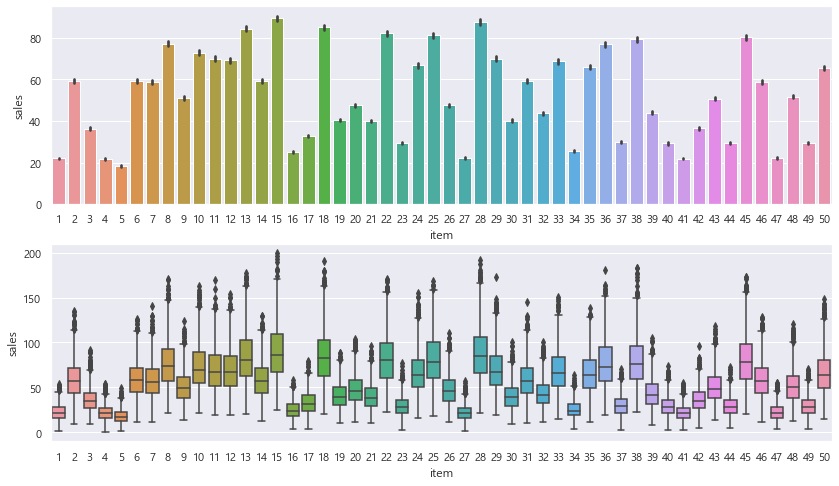

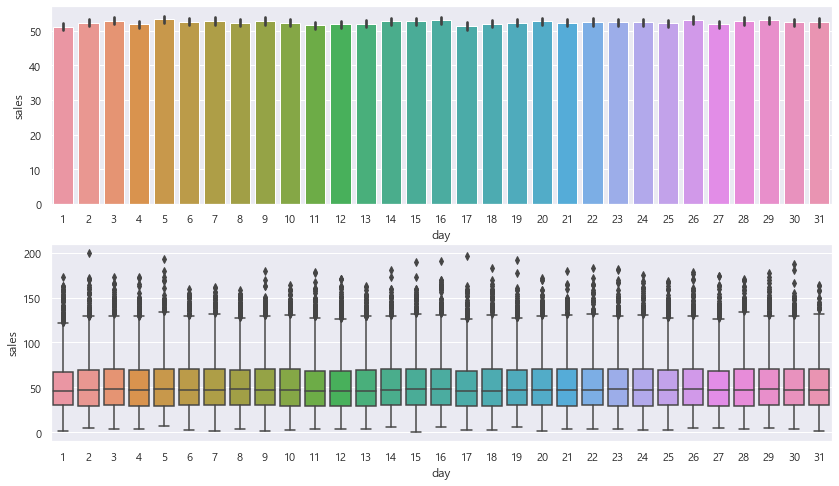

In [28]:
k = len(columns_cat_count)

for i in range(k) :
    crosstab = get_crosstab(train_sp, columns_cat_count[i], target)
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
    sns.barplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax1)
    sns.boxplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax2)

## target 확인

<AxesSubplot:xlabel='sales', ylabel='Density'>

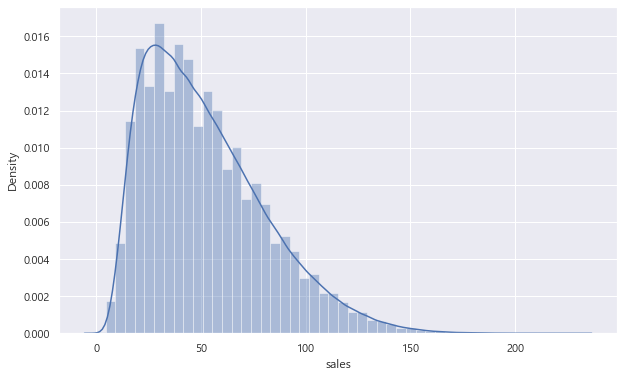

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train[target], ax=ax)
# sns.distplot(train_sp[target], ax=ax)

<AxesSubplot:xlabel='sales', ylabel='Density'>

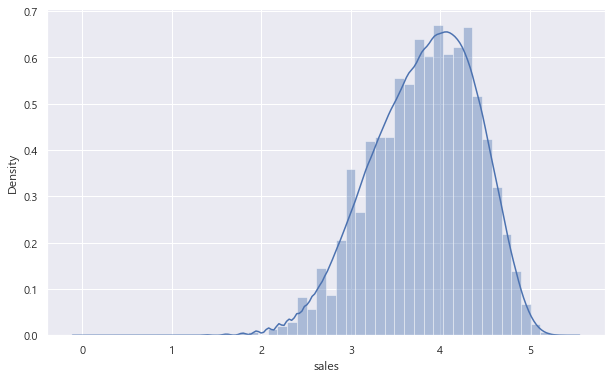

In [30]:
# target 분포를 log scale로 확인
# 조금 더 정규 분포에 가까운 분포를 띄는지 확인하기 위함
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(np.log1p(train[target]), ax=ax)

# Group by

## store

In [31]:
train_gb = train.groupby('store').agg({
    target : 'sum'
})

In [32]:
train_gb

,sales
store,
1,4315603
2,6120128
3,5435144
4,5012639
5,3631016
6,3627670
7,3320009
8,5856169
9,5025976


In [33]:
train_gb_order = train_gb.sort_values(target, ascending=False)
train_gb_order

,sales
store,
2,6120128
8,5856169
3,5435144
10,5360158
9,5025976
4,5012639
1,4315603
5,3631016
6,3627670


In [34]:
# train_gb_top = train_gb_order.iloc[:20]
train_gb_top = train_gb_order
train_gb_top.index = train_gb_top.index.astype('str')

Text(0, 0.5, 'Sales')

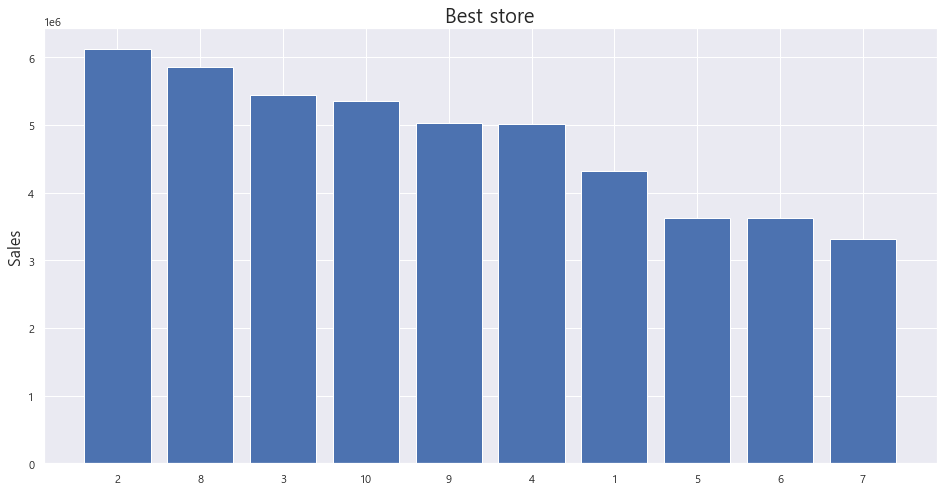

In [35]:
plt.figure(figsize=(16, 8))
plt.bar(train_gb_top.index, train_gb_top[target])

plt.title('Best store', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## item

In [36]:
train_gb = train.groupby('item').agg({
    target : 'sum',
})

In [37]:
train_gb

,sales
item,
1,401384
2,1069564
3,669087
4,401907
5,335230
6,1068281
7,1068777
8,1405108
9,938379


In [38]:
train_gb_order = train_gb.sort_values(target, ascending=False)
train_gb_order

,sales
item,
15,1607442
28,1604713
13,1539621
18,1538876
25,1473334
45,1471467
38,1470330
22,1469971
36,1406548


In [39]:
train_gb_top = train_gb_order.iloc[:20]
train_gb_top.index = train_gb_top.index.astype('str')

Text(0, 0.5, 'Sales')

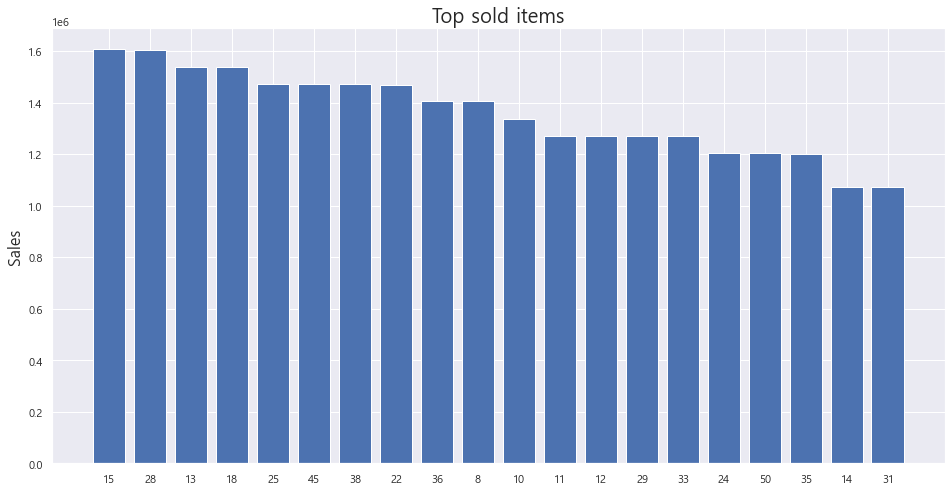

In [40]:
plt.figure(figsize=(16, 8))
plt.bar(train_gb_top.index, train_gb_top[target])

plt.title('Top sold items', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## year & month

In [41]:
train_gb = train.groupby(['year', 'month']).agg({
    'year' : 'first',
    'month' : 'first',
    target : 'sum',
})

In [42]:
train_gb

year  month    sales
year month                      
2013 1      2013      1   454904
     2      2013      2   459417
     3      2013      3   617382
     4      2013      4   682274
     5      2013      5   763242
     6      2013      6   795597
     7      2013      7   855922
     8      2013      8   766761
     9      2013      9   689907
     10     2013     10   656587
     11     2013     11   692643
     12     2013     12   506607
2014 1      2014      1   525987
     2      2014      2   529117
     3      2014      3   704301
     4      2014      4   788914
     5      2014      5   882877
     6      2014      6   906842
     7      2014      7   989010
     8      2014      8   885596
     9      2014      9   785124
     10     2014     10   758883
     11     2014     11   800783
     12     2014     12   578048
2015 1      2015      1   552513
     2      2015      2   551317
     3      2015      3   730951
     4      2015      4   824467
     5      2015      5   926902
     6      2015      6   937184
     7      2015      7  1037350
     8      2015      8   920401
     9      2015      9   823332
     10     2015     10   797253
     11     2015     11   827645
     12     2015     12   607572
2016 1      2016      1   602439
     2      2016      2   614957
     3      2016      3   790881
     4      2016      4   901950
     5      2016      5   988730
     6      2016      6  1022664
     7      2016      7  1138718
     8      2016      8   981494
     9      2016      9   896831
     10     2016     10   863637
     11     2016     11   891448
     12     2016     12   663411
2017 1      2017      1   617306
     2      2017      2   621369
     3      2017      3   822667
     4      2017      4   938862
     5      2017      5  1020686
     6      2017      6  1064624
     7      2017      7  1171393
     8      2017      8  1026403
     9      2017      9   935263
     10     2017     10   891160
     11     2017     11   928837
     12     2017     12   695170

In [43]:
train_gb_2013 = train_gb[train_gb['year'] == 2013]
train_gb_2014 = train_gb[train_gb['year'] == 2014]
train_gb_2015 = train_gb[train_gb['year'] == 2015]
train_gb_2016 = train_gb[train_gb['year'] == 2016]
train_gb_2017 = train_gb[train_gb['year'] == 2017]

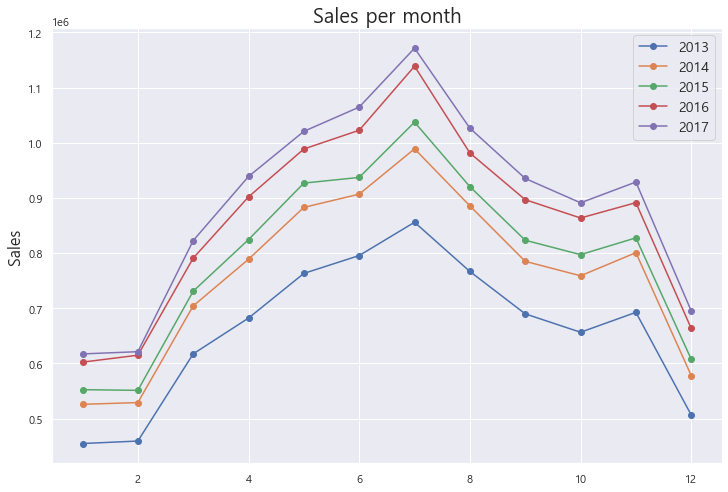

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(train_gb_2013['month'], train_gb_2013[target], '-o', label='2013')
plt.plot(train_gb_2014['month'], train_gb_2014[target], '-o', label='2014')
plt.plot(train_gb_2015['month'], train_gb_2015[target], '-o', label='2015')
plt.plot(train_gb_2016['month'], train_gb_2016[target], '-o', label='2016')
plt.plot(train_gb_2017['month'], train_gb_2017[target], '-o', label='2017')

plt.title('Sales per month', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend(fontsize=14)

## year & store

In [45]:
train_gb = train.groupby(['year', 'store']).agg({
    target : 'sum'
})

In [46]:
train_gb

sales
year store         
2013 1       717840
     2      1020238
     3       903936
     4       835059
     5       603783
     6       604373
     7       552223
     8       974655
     9       835788
     10      893348
2014 1       826786
     2      1171797
     3      1040520
     4       959205
     5       695599
     6       695214
     7       635978
     8      1121897
     9       961779
     10     1026707
2015 1       861710
     2      1222184
     3      1086103
     4      1002730
     5       725342
     6       725917
     7       664267
     8      1171046
     9      1006021
     10     1071567
2016 1       937493
     2      1329523
     3      1180619
     4      1088195
     5       789271
     6       786299
     7       720382
     8      1270695
     9      1090831
     10     1163852
2017 1       971774
     2      1376386
     3      1223966
     4      1127450
     5       817021
     6       815867
     7       747159
     8      1317876
     9      1131557
     10     1204684

In [47]:
train_gb = train_gb.reset_index()
train_gb

,year,store,sales
0,2013,1,717840
1,2013,2,1020238
2,2013,3,903936
3,2013,4,835059
4,2013,5,603783
5,2013,6,604373
6,2013,7,552223
7,2013,8,974655
8,2013,9,835788
9,2013,10,893348


In [48]:
train_gb_top = train.groupby(['store']).agg({
    target : 'sum'
})

In [49]:
train_gb_top = train_gb_top.sort_values(target, ascending=False)

In [50]:
# train_gb_top = train_gb_top.iloc[:10]
train_gb_top

,sales
store,
2,6120128
8,5856169
3,5435144
10,5360158
9,5025976
4,5012639
1,4315603
5,3631016
6,3627670


In [51]:
top_store = train_gb_top.index
top_store

Int64Index([2, 8, 3, 10, 9, 4, 1, 5, 6, 7], dtype='int64', name='store')

<AxesSubplot:xlabel='store', ylabel='sales'>

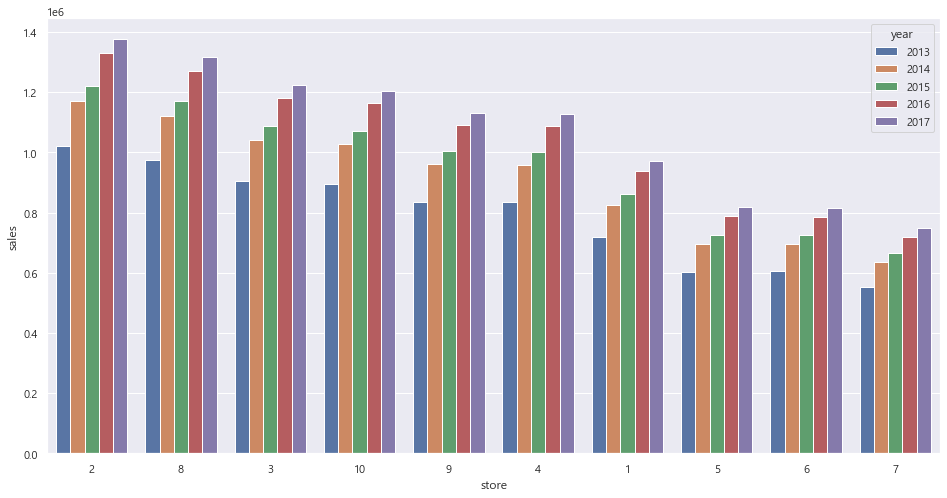

In [52]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=train_gb, x='store', y=target, order=top_store, hue='year', ax=ax)

- store도 sales에 영향을 줄 수 있는 feature가 될 수 있음

In [53]:
train_gb = train_gb.sort_values('sales', ascending=False)
train_gb

,year,store,sales
41,2017,2,1376386
31,2016,2,1329523
47,2017,8,1317876
37,2016,8,1270695
42,2017,3,1223966
21,2015,2,1222184
49,2017,10,1204684
32,2016,3,1180619
11,2014,2,1171797
27,2015,8,1171046


In [54]:
train_gb_2013 = train_gb[train_gb['year'] == 2013]
train_gb_2014 = train_gb[train_gb['year'] == 2014]
train_gb_2015 = train_gb[train_gb['year'] == 2015]
train_gb_2016 = train_gb[train_gb['year'] == 2016]
train_gb_2017 = train_gb[train_gb['year'] == 2017]

In [55]:
sum_2013 = train_gb_2013[target].sum()
sum_2014 = train_gb_2014[target].sum()
sum_2015 = train_gb_2015[target].sum()
sum_2016 = train_gb_2016[target].sum()
sum_2017 = train_gb_2017[target].sum()

In [56]:
train_gb_2013['rate'] = train_gb_2013[target] / sum_2013 * 100
train_gb_2014['rate'] = train_gb_2014[target] / sum_2014 * 100
train_gb_2015['rate'] = train_gb_2015[target] / sum_2015 * 100
train_gb_2016['rate'] = train_gb_2016[target] / sum_2016 * 100
train_gb_2017['rate'] = train_gb_2017[target] / sum_2017 * 100

In [57]:
train_gb_2013_top = train_gb_2013.iloc[:10]
train_gb_2014_top = train_gb_2014.iloc[:10]
train_gb_2015_top = train_gb_2015.iloc[:10]
train_gb_2016_top = train_gb_2016.iloc[:10]
train_gb_2017_top = train_gb_2017.iloc[:10]

In [58]:
train_gb_2013_top

,year,store,sales,rate
1,2013,2,1020238,12.847334
7,2013,8,974655,12.273331
2,2013,3,903936,11.382802
9,2013,10,893348,11.249473
8,2013,9,835788,10.524650
3,2013,4,835059,10.515470
0,2013,1,717840,9.039391
5,2013,6,604373,7.610559
4,2013,5,603783,7.603130
6,2013,7,552223,6.953861


In [59]:
train_gb_2013_top = train_gb_2013_top[['store', 'rate']]
train_gb_2014_top = train_gb_2014_top[['store', 'rate']]
train_gb_2015_top = train_gb_2015_top[['store', 'rate']]
train_gb_2016_top = train_gb_2016_top[['store', 'rate']]
train_gb_2017_top = train_gb_2017_top[['store', 'rate']]

In [60]:
colors = [[] for _ in range(3)]

n = len(train_gb_2013_top)
alphas = np.arange(n, 0, -1) / n

for alpha in alphas :
    colors[0].append((0.3, 0.5, 0.8, alpha))
    colors[1].append((0.3, 0.7, 0.3, alpha))
    colors[2].append((0.75, 0.3, 0.3, alpha))

In [61]:
dfs = [train_gb_2013_top, train_gb_2014_top, train_gb_2015_top]

In [62]:
titles = ['2013', '2014', '2015']

Text(0.5, 0.98, 'Top selling store for each year')

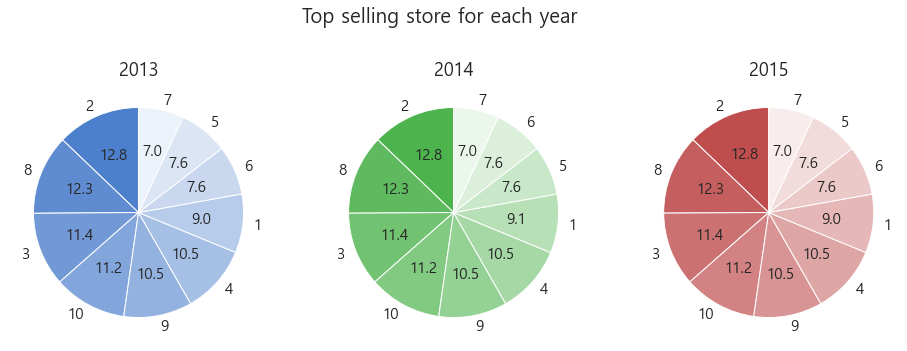

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for ax, df, color, title in zip(axes, dfs, colors, titles) :
    ax.pie(df['rate'], labels=df['store'], autopct='%.1f', colors=color, startangle=90, textprops={'fontsize': 15})
    ax.set_title(title, fontsize=18)
    
fig.suptitle('Top selling store for each year', fontsize=20)

Text(0.5, 0.98, 'Top selling store for each year')

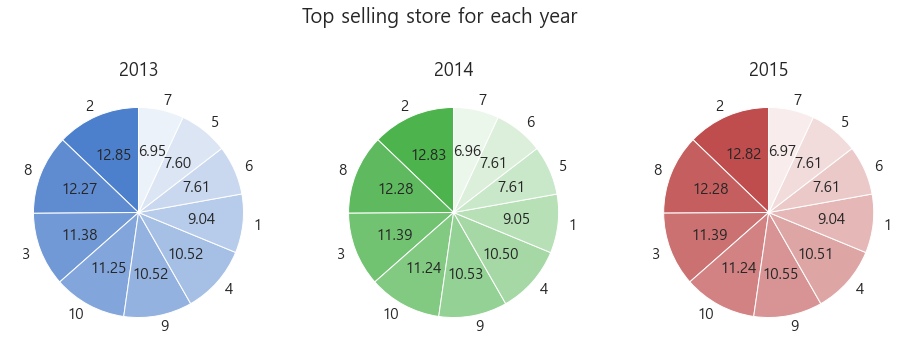

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for ax, df, color, title in zip(axes, dfs, colors, titles) :
    ax.pie(df['rate'], labels=df['store'], autopct='%.2f', colors=color, startangle=90, textprops={'fontsize': 15})
    ax.set_title(title, fontsize=18)
    
fig.suptitle('Top selling store for each year', fontsize=20)

In [65]:
colors = [[] for _ in range(2)]

n = len(train_gb_2013_top)
alphas = np.arange(n, 0, -1) / n

for alpha in alphas :
    colors[0].append((0.3, 0.5, 0.8, alpha))
    colors[1].append((0.3, 0.7, 0.3, alpha))

In [66]:
dfs = [train_gb_2016_top, train_gb_2017_top]

In [67]:
titles = ['2016', '2017']

Text(0.5, 0.98, 'Top selling store for each year')

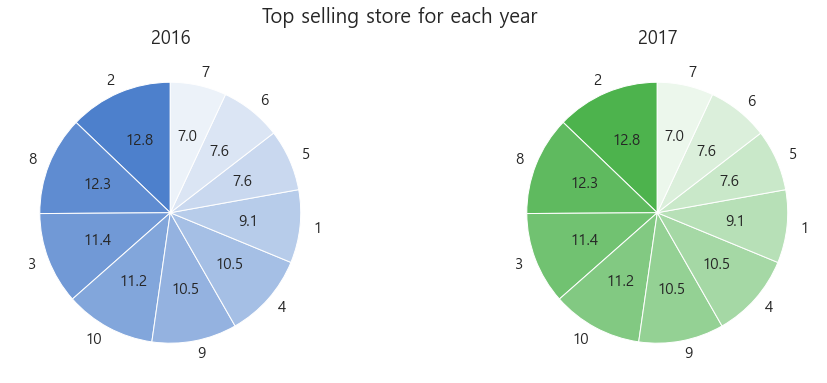

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, df, color, title in zip(axes, dfs, colors, titles) :
    ax.pie(df['rate'], labels=df['store'], autopct='%.1f', colors=color, startangle=90, textprops={'fontsize': 15})
    ax.set_title(title, fontsize=18)
    
fig.suptitle('Top selling store for each year', fontsize=20)

- 연도별로 store별 sales 비율이 거의 동일

## year & item_id 

In [69]:
train_gb = train.groupby(['year', 'item']).agg({
    target : 'sum'
})

In [70]:
train_gb

sales
year item        
2013 1      66723
     2     178096
     3     111412
     4      67309
     5      55621
...           ...
2017 46    240533
     47     90680
     48    211365
     49    120644
     50    269939

[250 rows x 1 columns]

In [71]:
train_gb = train_gb.reset_index()
train_gb

,year,item,sales
0,2013,1,66723
1,2013,2,178096
2,2013,3,111412
3,2013,4,67309
4,2013,5,55621
...,...,...,...
245,2017,46,240533
246,2017,47,90680
247,2017,48,211365
248,2017,49,120644


In [72]:
train_gb_top = train.groupby(['item']).agg({
    target : 'sum'
})

In [73]:
train_gb_top = train_gb_top.sort_values(target, ascending=False)

In [74]:
train_gb_top = train_gb_top.iloc[:10]
train_gb_top

,sales
item,
15,1607442
28,1604713
13,1539621
18,1538876
25,1473334
45,1471467
38,1470330
22,1469971
36,1406548


In [75]:
top_items = train_gb_top.index
top_items

Int64Index([15, 28, 13, 18, 25, 45, 38, 22, 36, 8], dtype='int64', name='item')

In [76]:
train_gb = train_gb[train_gb['item'].isin(top_items)]
train_gb

,year,item,sales
7,2013,8,233425
12,2013,13,256064
14,2013,15,267529
17,2013,18,256583
21,2013,22,245129
24,2013,25,244552
27,2013,28,267152
35,2013,36,233656
37,2013,38,245280
44,2013,45,244735


<AxesSubplot:xlabel='item', ylabel='sales'>

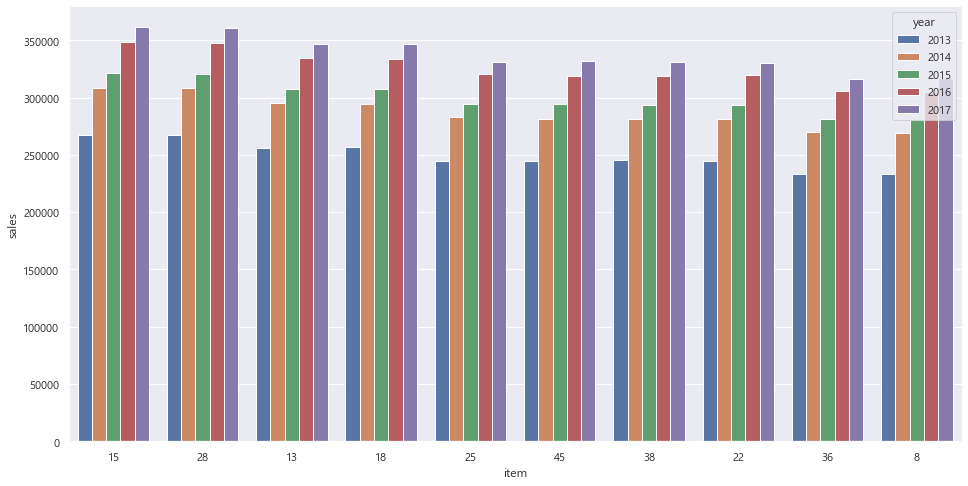

In [77]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=train_gb, x='item', y=target, order=top_items, hue='year', ax=ax)

In [78]:
train_gb = train_gb.sort_values('sales', ascending=False)
train_gb

,year,item,sales
214,2017,15,361586
227,2017,28,360768
164,2016,15,348760
177,2016,28,348160
212,2017,13,346565
217,2017,18,346448
162,2016,13,334430
167,2016,18,334141
244,2017,45,331783
237,2017,38,331005


In [79]:
train_gb_2013 = train_gb[train_gb['year'] == 2013]
train_gb_2014 = train_gb[train_gb['year'] == 2014]
train_gb_2015 = train_gb[train_gb['year'] == 2015]
train_gb_2016 = train_gb[train_gb['year'] == 2016]
train_gb_2017 = train_gb[train_gb['year'] == 2017]

In [80]:
sum_2013 = train_gb_2013[target].sum()
sum_2014 = train_gb_2014[target].sum()
sum_2015 = train_gb_2015[target].sum()
sum_2016 = train_gb_2016[target].sum()
sum_2017 = train_gb_2017[target].sum()

In [81]:
train_gb_2013['rate'] = train_gb_2013[target] / sum_2013 * 100
train_gb_2014['rate'] = train_gb_2014[target] / sum_2014 * 100
train_gb_2015['rate'] = train_gb_2015[target] / sum_2015 * 100
train_gb_2016['rate'] = train_gb_2016[target] / sum_2016 * 100
train_gb_2017['rate'] = train_gb_2017[target] / sum_2017 * 100

In [82]:
train_gb_2013_top = train_gb_2013.iloc[:10]
train_gb_2014_top = train_gb_2014.iloc[:10]
train_gb_2015_top = train_gb_2015.iloc[:10]
train_gb_2016_top = train_gb_2016.iloc[:10]
train_gb_2017_top = train_gb_2017.iloc[:10]

In [83]:
train_gb_2013_top

,year,item,sales,rate
14,2013,15,267529,10.726453
27,2013,28,267152,10.711337
17,2013,18,256583,10.287578
12,2013,13,256064,10.266769
37,2013,38,245280,9.834389
21,2013,22,245129,9.828335
44,2013,45,244735,9.812538
24,2013,25,244552,9.805201
35,2013,36,233656,9.368331
7,2013,8,233425,9.359069


In [84]:
train_gb_2013_top = train_gb_2013_top[['item', 'rate']]
train_gb_2014_top = train_gb_2014_top[['item', 'rate']]
train_gb_2015_top = train_gb_2015_top[['item', 'rate']]
train_gb_2016_top = train_gb_2016_top[['item', 'rate']]
train_gb_2017_top = train_gb_2017_top[['item', 'rate']]

In [85]:
colors = [[] for _ in range(3)]

n = len(train_gb_2013_top)
alphas = np.arange(n, 0, -1) / n

for alpha in alphas :
    colors[0].append((0.3, 0.5, 0.8, alpha))
    colors[1].append((0.3, 0.7, 0.3, alpha))
    colors[2].append((0.75, 0.3, 0.3, alpha))

In [86]:
dfs = [train_gb_2013_top, train_gb_2014_top, train_gb_2015_top]

In [87]:
titles = ['2013', '2014', '2015']

Text(0.5, 0.98, 'Top selling item for each year')

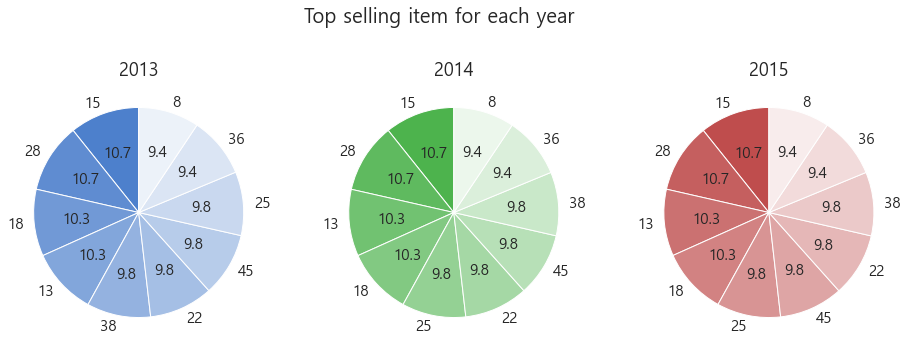

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for ax, df, color, title in zip(axes, dfs, colors, titles) :
    ax.pie(df['rate'], labels=df['item'], autopct='%.1f', colors=color, startangle=90, textprops={'fontsize': 15})
    ax.set_title(title, fontsize=18)
    
fig.suptitle('Top selling item for each year', fontsize=20)

In [89]:
colors = [[] for _ in range(2)]

n = len(train_gb_2013_top)
alphas = np.arange(n, 0, -1) / n

for alpha in alphas :
    colors[0].append((0.3, 0.5, 0.8, alpha))
    colors[1].append((0.3, 0.7, 0.3, alpha))

In [90]:
dfs = [train_gb_2016_top, train_gb_2017_top]

In [91]:
titles = ['2016', '2017']

Text(0.5, 0.98, 'Top selling item for each year')

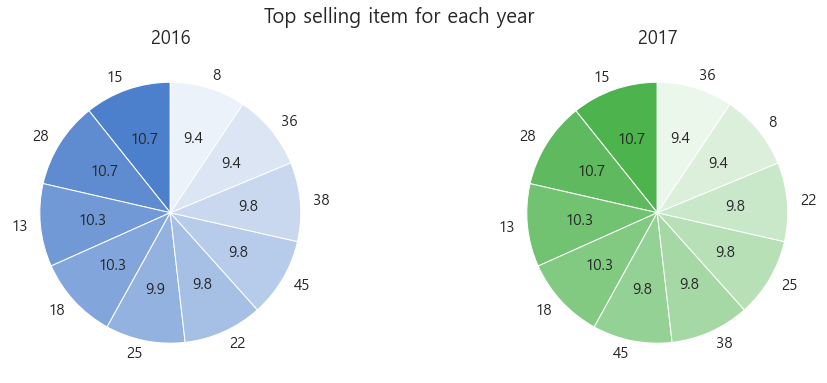

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, df, color, title in zip(axes, dfs, colors, titles) :
    ax.pie(df['rate'], labels=df['item'], autopct='%.1f', colors=color, startangle=90, textprops={'fontsize': 15})
    ax.set_title(title, fontsize=18)
    
fig.suptitle('Top selling item for each year', fontsize=20)

- 연도별로 item별 sales 비율이 거의 동일하나, item 순위는 다름

# (추가) target scale 변경

In [93]:
train_sp[target] = np.log1p(train_sp[target])

## 수치형 data

- 수치형 data가 target인 sales 밖에 없음

In [94]:
# k = len(columns_num)

# for i in range(k) :
#     with sns.axes_style('white') :
#         sns.jointplot(data=train, x=columns_num[i], y=target, kind='reg')

In [95]:
# corr_matrix = train.corr()
# corr_matrix[target].sort_values(ascending=False)

In [96]:
# fig, ax = plt.subplots(figsize=(20, 16))
# sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, square=True, cbar=True, ax=ax)

## 범주형 data

In [97]:
def get_crosstab(data, column, target) :
    crosstab = pd.crosstab(data[column], data[target], normalize='index') * 100
    
    return crosstab

In [98]:
columns_cat_count = []

for column in columns_cat :
    
    if len(train[column].value_counts()) <= 20 :
        columns_cat_count.append(column)

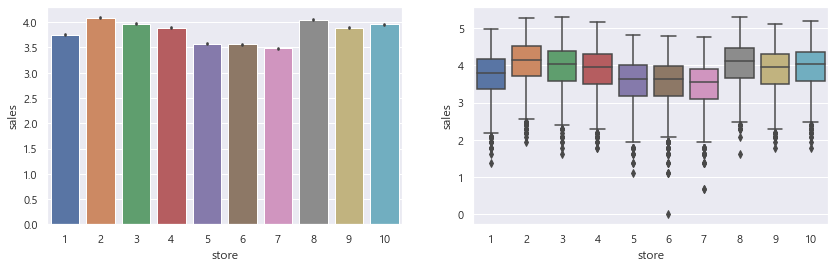

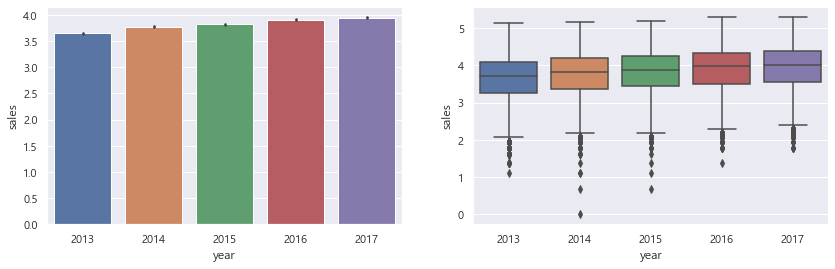

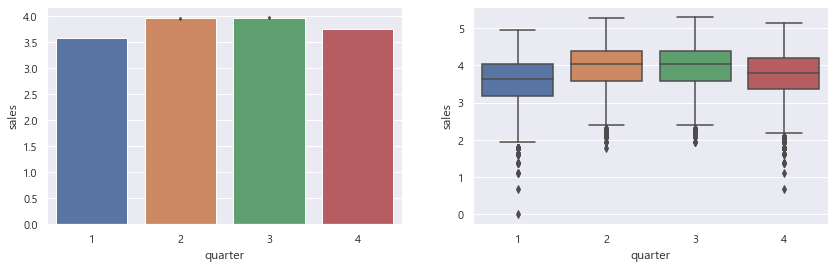

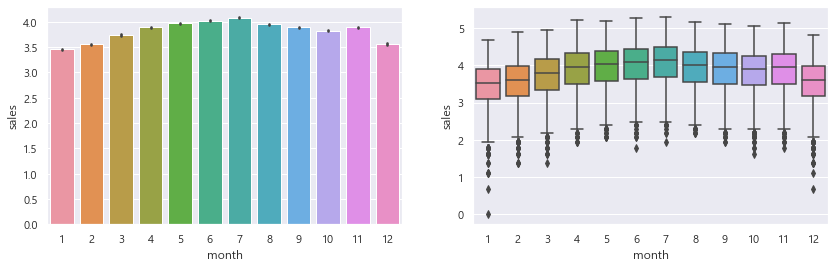

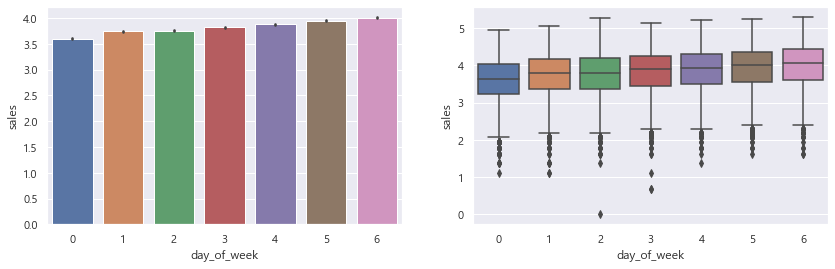

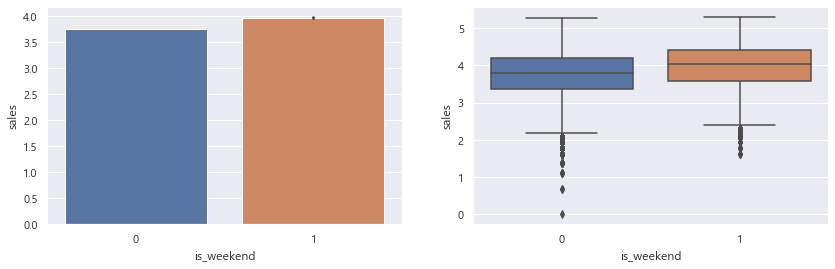

In [99]:
k = len(columns_cat_count)

for i in range(k) :
    crosstab = get_crosstab(train_sp, columns_cat_count[i], target)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    sns.barplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax1)
    sns.boxplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax2)

- year과 day_of_week는 숫자가 커짐에 따라 sales가 커지므로, 수치형 data로 취급해도 됨

In [100]:
columns_cat_count = []

for column in columns_cat :
    
    if 20 < len(train[column].value_counts()) <= 50 :
        columns_cat_count.append(column)

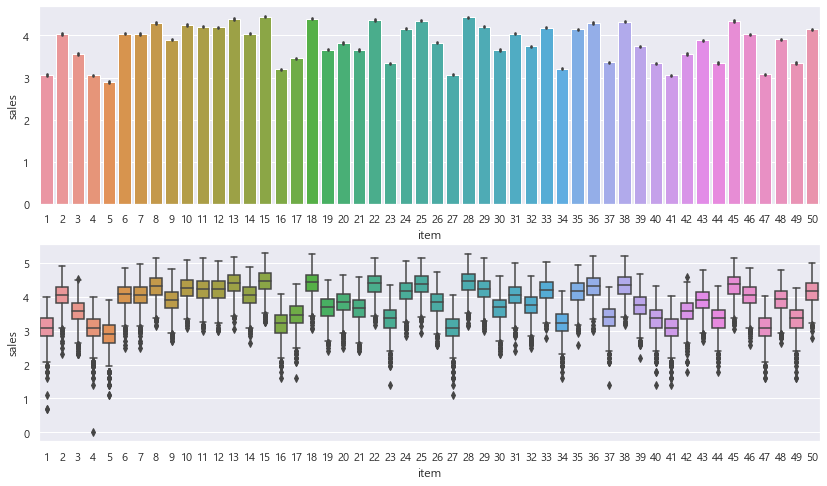

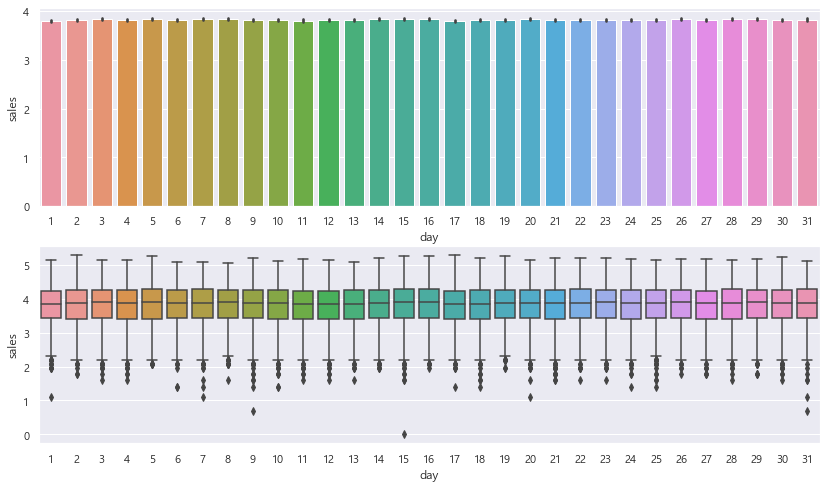

In [101]:
k = len(columns_cat_count)

for i in range(k) :
    crosstab = get_crosstab(train_sp, columns_cat_count[i], target)
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
    sns.barplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax1)
    sns.boxplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax2)